 **Can you predict whether a country is undergoing a
civil war?**

This dataset contains information about whether a civil war was occurring at a particular time in a particular
country. Country and time information have been purposely scrubbed from the dataset, as your goal is simply to
learn an association (if it exists) between measures of schooling, exports, population, etc., and whether a civil war
was occuring at the point in time when the data were gathered.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*   exports a measure of the dependence of a country on commodity exports
*   schooling percentage, school enrollment rate for males


*   growth annual GDP growth rate
*   concentration population concentration, from 0 to 1 (all in one city)


*   lnpop natural logarithm of the country’s population
*   fractionalization index measuring divides on ethnic/religious lines

*   dominance YES if one ethnic group dominates the country, NO otherwise
*   civil.war YES if civil war was occurring when the data were gathered, NO otherwise









**Please develop different classification models: Logistic regression, KNN, and Decision tree**

In [ ]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/civilWar.csv")

In [ ]:
# Check types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   exports            741 non-null    float64
 1   schooling          741 non-null    float64
 2   growth             741 non-null    float64
 3   concentration      741 non-null    float64
 4   lnpop              741 non-null    float64
 5   fractionalization  741 non-null    int64  
 6   dominance          741 non-null    object 
 7   civil.war          741 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 46.4+ KB


In [ ]:
# Check head
df.head(10)

,exports,schooling,growth,concentration,lnpop,fractionalization,dominance,civil.war
0,0.190,10.0,-1.682,0.916,16.293980,132,YES,NO
1,0.193,16.0,2.843,0.916,16.436260,132,YES,NO
2,0.269,26.0,4.986,0.916,16.589220,132,YES,NO
3,0.368,40.0,3.261,0.916,16.742380,132,YES,NO
4,0.170,59.0,1.602,0.916,16.901039,132,YES,NO
5,0.179,67.0,-1.465,0.916,17.034790,132,YES,YES
6,0.218,66.0,-1.526,0.913,17.151600,132,YES,YES
7,0.202,6.0,2.633,0.648,15.460320,4446,NO,YES
8,0.202,9.0,1.851,0.648,15.536130,4446,NO,YES
9,0.360,10.0,-9.321,0.648,15.627560,4134,NO,YES


In [ ]:
# Convert 2 columns Dominance and Civil.war: YES: 1 and NO: 0
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply the LabelEncoder to the columns
df['dominance'] = le.fit_transform(df['dominance'])
df['civil.war'] = le.fit_transform(df['civil.war'])

# Check the head of the DataFrame to verify changes
df.head(10)



,exports,schooling,growth,concentration,lnpop,fractionalization,dominance,civil.war
0,0.190,10.0,-1.682,0.916,16.293980,132,1,0
1,0.193,16.0,2.843,0.916,16.436260,132,1,0
2,0.269,26.0,4.986,0.916,16.589220,132,1,0
3,0.368,40.0,3.261,0.916,16.742380,132,1,0
4,0.170,59.0,1.602,0.916,16.901039,132,1,0
5,0.179,67.0,-1.465,0.916,17.034790,132,1,1
6,0.218,66.0,-1.526,0.913,17.151600,132,1,1
7,0.202,6.0,2.633,0.648,15.460320,4446,0,1
8,0.202,9.0,1.851,0.648,15.536130,4446,0,1
9,0.360,10.0,-9.321,0.648,15.627560,4134,0,1


In [ ]:
# Split X, y
X = df.drop('civil.war', axis=1)
y = df['civil.war']


In [ ]:
# Scaling for X using Minmaxscaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check shape
print(f"Original data shapes: {X_train.shape, X_test.shape}")

Original data shapes: ((592, 7), (149, 7))


In [ ]:
# Define parameter grid
param_grid = {
    'penalty': ['l1'],
    'C': np.logspace(-4, 4, 10)
}
logreg_l1 = LogisticRegression(max_iter=10000, solver='liblinear')
logreg_l1_cv = GridSearchCV(estimator=logreg_l1, param_grid=param_grid, cv = 10, scoring='accuracy')
logreg_l1_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_l1_cv.best_params_)
print("accuracy :",logreg_l1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.0001, 'penalty': 'l1'}
accuracy : 0.871638418079096


In [ ]:
# Define parameter grid
param_grid = {
    'penalty': ['l2'],
    'C': np.logspace(-4, 4, 10)
}
logreg_l2 = LogisticRegression(max_iter=10000, solver='lbfgs')
logreg_l2_cv = GridSearchCV(estimator=logreg_l2, param_grid=param_grid, cv = 10, scoring='accuracy')
logreg_l2_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ", logreg_l2_cv.best_params_)
print("accuracy :", logreg_l2_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.0001, 'penalty': 'l2'}
accuracy : 0.871638418079096


In [ ]:
logreg = LogisticRegression(C = 0.0001, penalty='l2', solver= 'lbfgs', max_iter= 10000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

Accuracy score of the Logistics Regression: 0.8456375838926175
Logistics Regression Classification:
[[126   0]
 [ 23   0]]


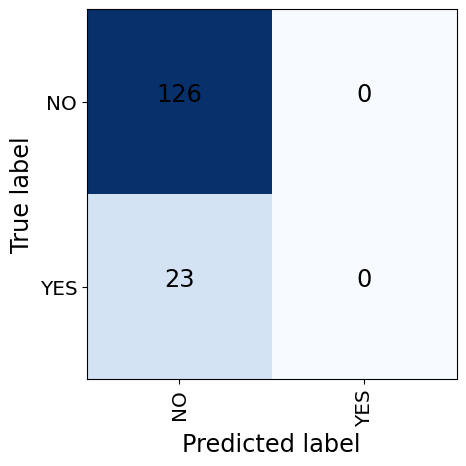

In [ ]:
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print("Accuracy score of the Logistics Regression:", accuracy_score(y_test, y_pred_logreg))
print("Logistics Regression Classification:")
print(confusion_matrix_logreg)

# Visualizing the confusion matrix

plt.imshow(confusion_matrix_logreg, cmap=plt.cm.Blues)
plt.text(0, 0, '{}'.format(confusion_matrix_logreg[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(confusion_matrix_logreg[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(confusion_matrix_logreg[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(confusion_matrix_logreg[1, 1]), horizontalalignment='center',fontsize = 'xx-large')
tick_marks = [0,1]
labels = ['NO', 'YES']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.yticks(tick_marks, labels,fontsize = 'x-large')
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()

In [ ]:
print('Classification Report of Logistic Regression model:')
print(classification_report(y_test, y_pred_logreg))

Classification Report of Logistic Regression model:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       126
           1       0.00      0.00      0.00        23

    accuracy                           0.85       149
   macro avg       0.42      0.50      0.46       149
weighted avg       0.72      0.85      0.77       149



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Create AUC Score For Logistics Regression
LogregPreds = logreg.predict_proba(X_test).T[1]
fprlogreg, tprlogreg, threshlogreg = roc_curve(y_test, LogregPreds)
roc_auc_logreg = roc_auc_score(y_test, LogregPreds)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Select your n_neighbors parameters------------------------
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}

#---------------------------------------------------------

knn = KNeighborsClassifier()
knn_model = GridSearchCV(knn, params, cv=5)
knn_model.fit(X_train, y_train)

print(knn_model.best_params_)
print(knn_model.best_score_)
print(pd.DataFrame(knn_model.cv_results_))

{'n_neighbors': 6}
0.8852015382424157
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.018205      0.015586         0.032993        0.005585   
1       0.003924      0.002632         0.020934        0.009650   
2       0.006043      0.004218         0.026981        0.007824   
3       0.010038      0.006129         0.024588        0.007385   
4       0.008967      0.007605         0.050087        0.021371   
5       0.010980      0.007883         0.078872        0.034372   
6       0.010760      0.008456         0.049005        0.021511   
7       0.005796      0.002841         0.037970        0.010895   
8       0.003902      0.002510         0.034702        0.006635   

  param_n_neighbors               params  split0_test_score  \
0                 2   {'n_neighbors': 2}           0.848739   
1                 3   {'n_neighbors': 3}           0.840336   
2                 4   {'n_neighbors': 4}           0.865546   
3                 5   {'n_neighbors': 5

Accuracy score of the KNN: 0.8590604026845637
KNN Classification:
[[122   4]
 [ 17   6]]


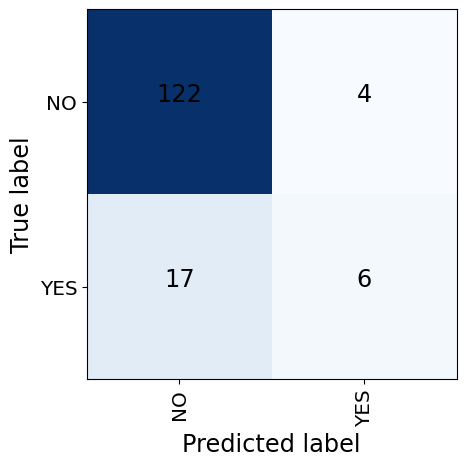

In [ ]:
# Fit model with best params
#create and fit the model-------------------------------------------------------
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
#-------------------------------------------------------------------------------

#predict via the model ---------------------------------------------------------
y_pred_knn = knn.predict(X_test)

confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("Accuracy score of the KNN:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification:")
print(confusion_matrix_knn)

# Visualizing the confusion matrix

plt.imshow(confusion_matrix_knn, cmap=plt.cm.Blues)
plt.text(0, 0, '{}'.format(confusion_matrix_knn[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(confusion_matrix_knn[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(confusion_matrix_knn[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(confusion_matrix_knn[1, 1]), horizontalalignment='center',fontsize = 'xx-large')
tick_marks = [0,1]
labels = ['NO', 'YES']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.yticks(tick_marks, labels,fontsize = 'x-large')
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()

In [ ]:
print('Classification Report of KNN model:')
print(classification_report(y_test, y_pred_knn))

Classification Report of KNN model:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       126
           1       0.60      0.26      0.36        23

    accuracy                           0.86       149
   macro avg       0.74      0.61      0.64       149
weighted avg       0.83      0.86      0.83       149



In [ ]:
# Create AUC Score For KNN
KnnPreds = knn.predict_proba(X_test)[:,1]
fprknn, tprknn, threshknn = roc_curve(y_test, KnnPreds)
roc_auc_knn = roc_auc_score(y_test, KnnPreds)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Build the decision tree
param_grid = {'max_depth' : [2,3,4, 5, 6, 7, 8, 9, 10],
              'criterion' :['gini', 'entropy']
             }

dtc_clf = DecisionTreeClassifier(random_state=1000)
dtc_clf_cv = GridSearchCV(estimator=dtc_clf, param_grid=param_grid, cv=5, verbose=True)
dtc_clf_cv.fit(X_train, y_train)

dtc_clf_cv.best_score_
# Best params
dtc_clf_cv.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'criterion': 'entropy', 'max_depth': 4}

In [ ]:
dtc_clf_tuned = DecisionTreeClassifier (criterion = "entropy",              # Create the object
                                  max_depth=4, random_state=7 )
dtc_clf_tuned.fit(X_train, y_train)                                         # Fit the model

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=7)

Accuracy score of the KNN: 0.8791946308724832
KNN Classification:
[[125   1]
 [ 17   6]]


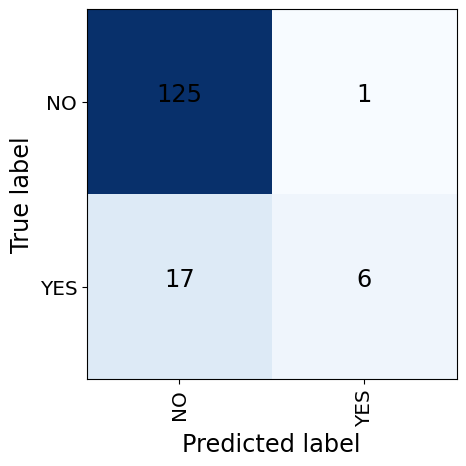

In [ ]:
#predict via the model ---------------------------------------------------------
y_pred_dtc = dtc_clf_tuned.predict(X_test)

confusion_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)

print("Accuracy score of the KNN:", accuracy_score(y_test, y_pred_dtc))
print("KNN Classification:")
print(confusion_matrix_dtc)

# Visualizing the confusion matrix

plt.imshow(confusion_matrix_dtc, cmap=plt.cm.Blues)
plt.text(0, 0, '{}'.format(confusion_matrix_dtc[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(confusion_matrix_dtc[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(confusion_matrix_dtc[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(confusion_matrix_dtc[1, 1]), horizontalalignment='center',fontsize = 'xx-large')
tick_marks = [0,1]
labels = ['NO', 'YES']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.yticks(tick_marks, labels,fontsize = 'x-large')
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()

In [ ]:
print('Classification Report of Decision Tree Model:')
print(classification_report(y_test, y_pred_dtc))

Classification Report of Decision Tree Model:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       126
           1       0.86      0.26      0.40        23

    accuracy                           0.88       149
   macro avg       0.87      0.63      0.67       149
weighted avg       0.88      0.88      0.85       149



In [ ]:
# Create AUC Score For Decision Tree
DTCPreds = dtc_clf_tuned.predict_proba(X_test)[:,1]
fprdct, tprdct, threshdct = roc_curve(y_test, DTCPreds)
roc_auc_dtc = roc_auc_score(y_test, DTCPreds)

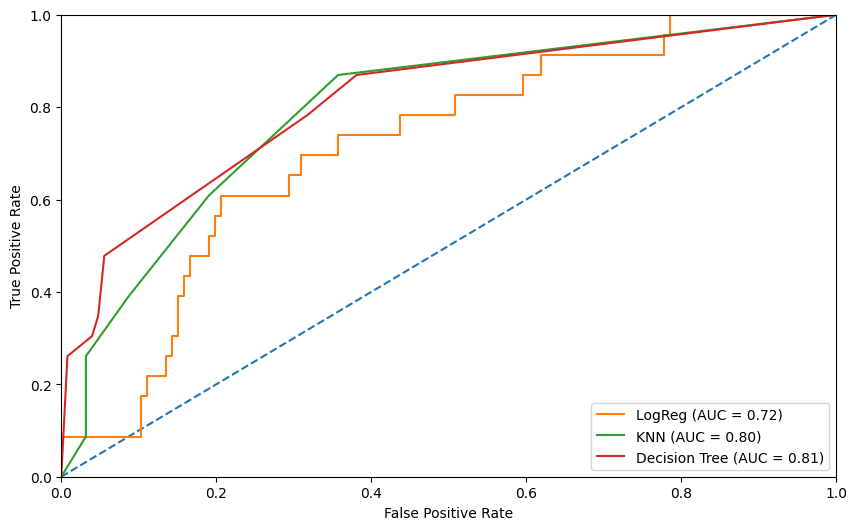

In [ ]:
#Plot the ROC curves
fig = plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fprlogreg, tprlogreg, label='LogReg (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fprknn, tprknn, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fprdct, tprdct, label='Decision Tree (AUC = %0.2f)' % roc_auc_dtc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()